In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Loan_Application=pd.read_csv("loan_application.csv")
Loan_Application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Missing Values are present in multiple columns and String Data needs to be encoded

This is a classificarion problem

In [3]:
Loan_Application.shape

(614, 13)

### DataFrame Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. From the DataSet we can say that both male and female are involved in fraud related to insurance claims.Maximum number of individuals are graduate that are involved in fraud.Applicant Income can se seen to be similar or nearly close to mean in the dataset.Co Applicant Income have a huge variation in column value where some values are zero also.There is very much variation in Loan Amount with missing values also.Loan_Amount_Term is almost same with some null values.Property on which loan was taken is present in both urban and rural areas.

### Checking the Datatypes of the columns

In [4]:
Loan_Application.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have float, int and object type values in our dataset

In [5]:
Loan_Application.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
Loan_Application.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
Loan_Application.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 13 missing values in Gender, 15 missing values in Dependents, 32 missing values in Self_Employed, 22 missing values in LoanAmount,

14 missing values in Loan_Amount_Term, 50 missing values in Credit_History

In [8]:
Loan_Application['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [9]:
Loan_Application.loc[Loan_Application["Loan_Status"]== " "] #for checking empty value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There is no null value in the target variable

In [10]:
Loan_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Using Simple Imputer for Imputing Data


In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values = np.nan,strategy="most_frequent")
for i in Loan_Application.columns:
    if Loan_Application[i].dtypes=="object"or"float64":
        Loan_Application[i]=imp.fit_transform(Loan_Application[i].values.reshape(-1,1))
Loan_Application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
Loan_Application = Loan_Application.astype({"CoapplicantIncome":'int64', "LoanAmount":'int64',"Loan_Amount_Term":'int64',"Credit_History":'int64',})
Loan_Application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,120,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [13]:
Loan_Application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.5+ KB


## Univariate Analysis

### Making DataFrame for Nominal Data

In [14]:
Loan_Application_nominal=Loan_Application[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()
Loan_Application_nominal

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,360,1,Urban,Y
4,Male,No,0,Graduate,No,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,360,1,Urban,Y


In [15]:
Loan_Application_nominal.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Univariate Analysis


#### Vizualization of the data :


For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Male      502
Female    112
Name: Gender, dtype: int64


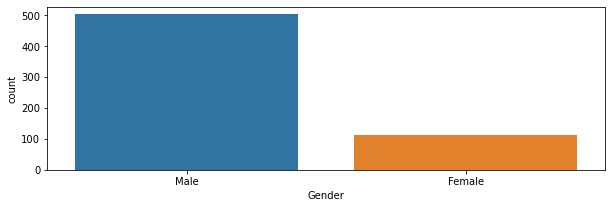

In [16]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Gender", data=Loan_Application_nominal)
print(Loan_Application_nominal["Gender"].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


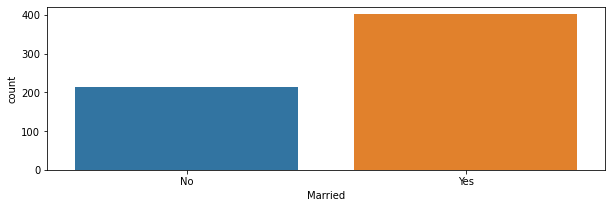

In [17]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Married", data=Loan_Application_nominal)
print(Loan_Application_nominal["Married"].value_counts())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


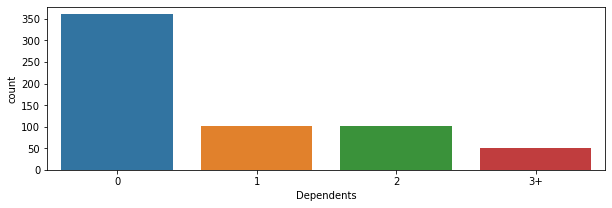

In [18]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Dependents", data=Loan_Application_nominal)
print(Loan_Application_nominal["Dependents"].value_counts())

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


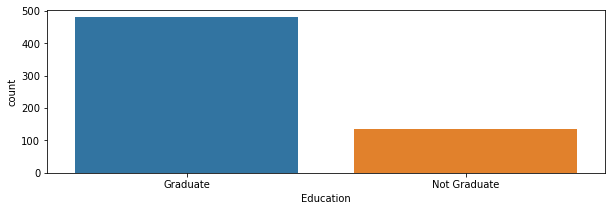

In [19]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Education", data=Loan_Application_nominal)
print(Loan_Application_nominal["Education"].value_counts())

No     532
Yes     82
Name: Self_Employed, dtype: int64


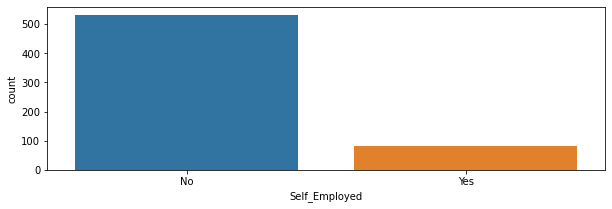

In [20]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Self_Employed", data=Loan_Application_nominal)
print(Loan_Application_nominal["Self_Employed"].value_counts())

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64


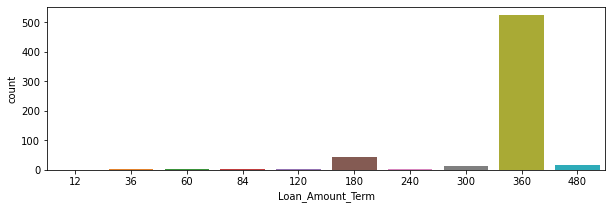

In [21]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Loan_Amount_Term", data=Loan_Application_nominal)
print(Loan_Application_nominal["Loan_Amount_Term"].value_counts())

1    525
0     89
Name: Credit_History, dtype: int64


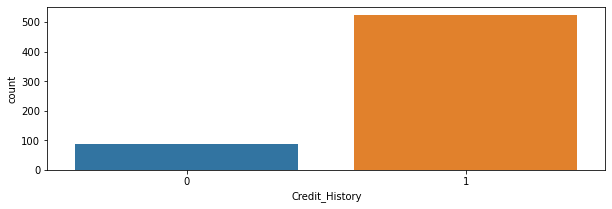

In [22]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Credit_History", data=Loan_Application_nominal)
print(Loan_Application_nominal["Credit_History"].value_counts())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


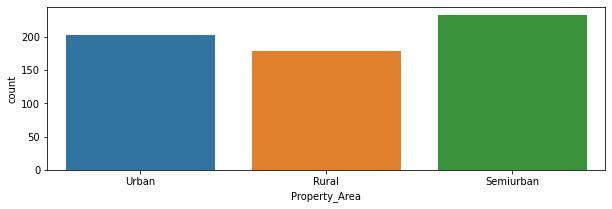

In [23]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Property_Area", data=Loan_Application_nominal)
print(Loan_Application_nominal["Property_Area"].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


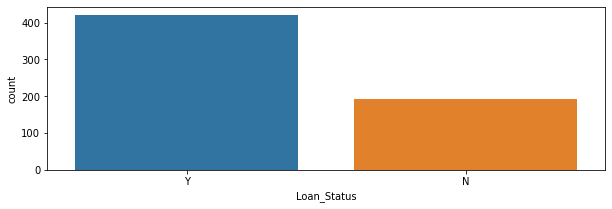

In [24]:
countplt,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Loan_Status", data=Loan_Application_nominal)
print(Loan_Application_nominal["Loan_Status"].value_counts())

### Label Encoding String Data

In [25]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [26]:
for i in Loan_Application.columns:
    if Loan_Application[i].dtypes=="object":
        Loan_Application[i]=enc.fit_transform(Loan_Application[i].values.reshape(-1,1))

In [27]:
Loan_Application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0,120,360,1,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508,128,360,1,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0,66,360,1,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358,120,360,1,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0,141,360,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0,71,360,1,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0,40,180,1,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240,253,360,1,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0,187,360,1,2.0,1.0


### Applying SMOTE for class imbalance

In [28]:
import sklearn
sklearn.__version__

'1.0.1'

In [29]:
import numpy 
numpy.__version__

'1.19.2'

In [30]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\user\anaconda3\lib\site-packages (0.8.1)


In [31]:
Loan_Application_y=Loan_Application.iloc[:,-1]
Loan_Application_y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [32]:
Loan_Application_x=Loan_Application.iloc[:,0:-1]
Loan_Application_x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0,120,360,1,2.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508,128,360,1,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0,66,360,1,2.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358,120,360,1,2.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0,141,360,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0,71,360,1,0.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0,40,180,1,0.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240,253,360,1,2.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0,187,360,1,2.0


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smt=SMOTE()
Loan_Application_X,Loan_Application_Y=smt.fit_resample(Loan_Application_x,Loan_Application_y)

In [35]:
Loan_Application_X.value_counts()

Loan_ID     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
613.000000  0.0     0.0      0.000000    0.0        1.0            4583             0                  133         360               0               1.000000         1
201.000000  1.0     0.0      2.000000    0.0        0.0            4923             0                  166         360               0               1.000000         1
214.000000  1.0     1.0      0.000000    0.0        0.0            3173             3021               137         360               1               2.000000         1
213.000000  1.0     1.0      3.000000    1.0        1.0            5703             0                  130         360               1               0.000000         1
212.000000  1.0     1.0      1.000000    0.0        1.0            7787             0                  240         360               1               2.000000        

In [36]:
Loan_Application_Y.value_counts()

0.0    422
1.0    422
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

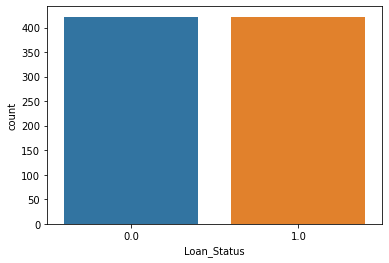

In [37]:
sns.countplot(Loan_Application_Y)

In [38]:
y=pd.DataFrame(Loan_Application_Y)
x=pd.DataFrame(Loan_Application_X)

In [39]:
Loan_Application = pd.concat([x, y], axis=1,)
Loan_Application

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.00000,0.000000,0.000000,0.00000,0.00000,5849,0,120,360,1,2.000000,1.0
1,1.000000,1.00000,1.000000,1.000000,0.00000,0.00000,4583,1508,128,360,1,0.000000,0.0
2,2.000000,1.00000,1.000000,0.000000,0.00000,1.00000,3000,0,66,360,1,2.000000,1.0
3,3.000000,1.00000,1.000000,0.000000,1.00000,0.00000,2583,2358,120,360,1,2.000000,1.0
4,4.000000,1.00000,0.000000,0.000000,0.00000,0.00000,6000,0,141,360,1,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,245.012969,1.00000,1.000000,2.103896,1.00000,0.00000,2632,1683,155,360,0,0.298701,0.0
840,373.259648,0.11574,1.000000,0.000000,1.00000,0.11574,2202,3261,176,339,0,0.884260,0.0
841,352.698123,1.00000,0.437307,0.874613,0.00000,0.00000,4839,1988,185,360,1,0.562693,0.0
842,293.522344,1.00000,0.603236,0.000000,0.00000,0.00000,20494,0,262,360,1,0.000000,0.0


### Checking the distribution of the continous value or the float type columns 

In [40]:
Loan_Application_continuous=Loan_Application[["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"]].copy()

In [41]:
Loan_Application_continuous.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

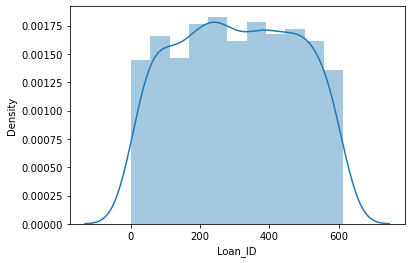

In [42]:
sns.distplot(Loan_Application_continuous['Loan_ID'],kde=True)

Plot is looking uniform with starting value 0 to 600.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

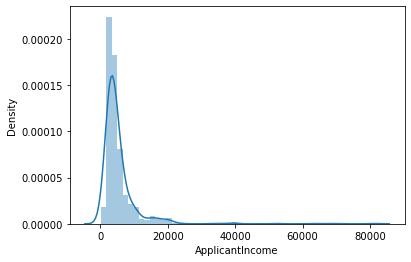

In [43]:
sns.distplot(Loan_Application_continuous['ApplicantIncome'],kde=True)

Plot is looking right skewed with minimum and maximum value as 0 to 20000.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

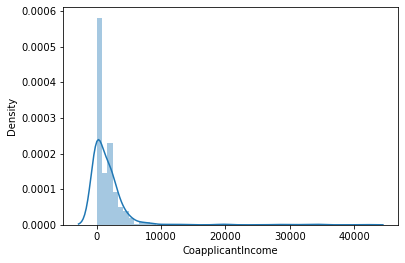

In [44]:
sns.distplot(Loan_Application_continuous['CoapplicantIncome'],kde=True)

Plot is Rightly skewed with minimum and maximum value 0 and 10000.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

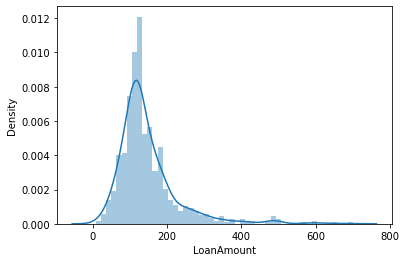

In [45]:
sns.distplot(Loan_Application_continuous['LoanAmount'],kde=True)

Plot is right skewed with minimum value 0 and maximum value 600. 

## Outliers Check

<AxesSubplot:>

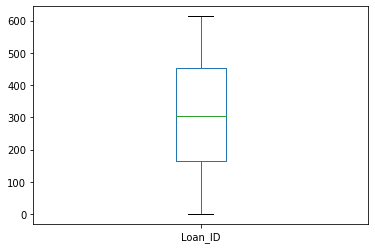

In [46]:
Loan_Application['Loan_ID'].plot.box()

<AxesSubplot:>

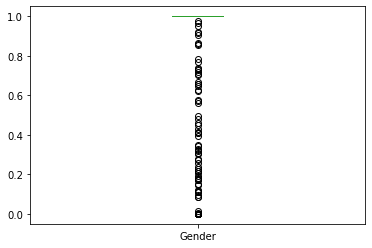

In [47]:
Loan_Application['Gender'].plot.box()

<AxesSubplot:>

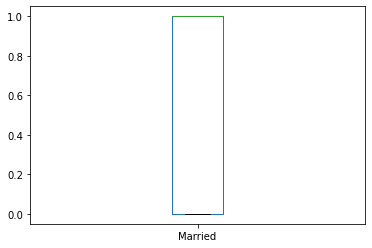

In [48]:
Loan_Application['Married'].plot.box()

<AxesSubplot:>

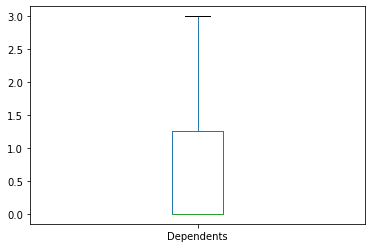

In [49]:
Loan_Application['Dependents'].plot.box()

<AxesSubplot:>

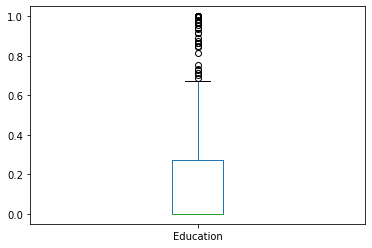

In [50]:
Loan_Application['Education'].plot.box()

<AxesSubplot:>

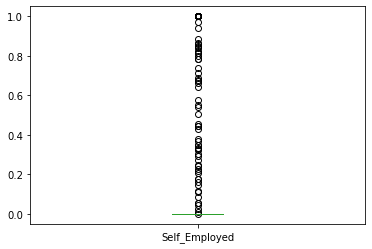

In [51]:
Loan_Application['Self_Employed'].plot.box()

<AxesSubplot:>

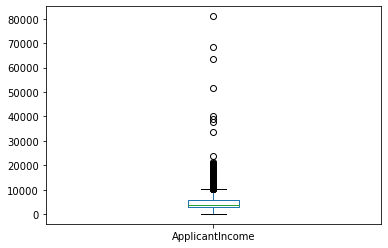

In [52]:
Loan_Application['ApplicantIncome'].plot.box()

<AxesSubplot:>

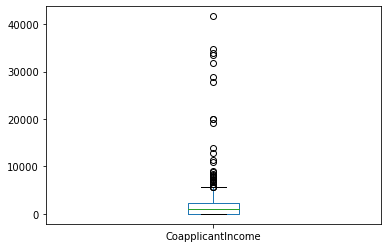

In [53]:
Loan_Application['CoapplicantIncome'].plot.box()

<AxesSubplot:>

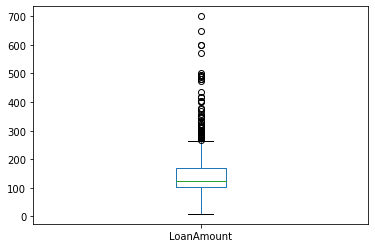

In [54]:
Loan_Application['LoanAmount'].plot.box()

<AxesSubplot:>

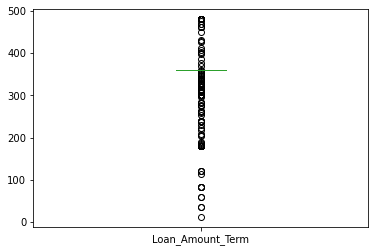

In [55]:
Loan_Application['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

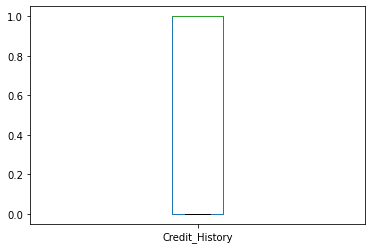

In [56]:
Loan_Application['Credit_History'].plot.box()

<AxesSubplot:>

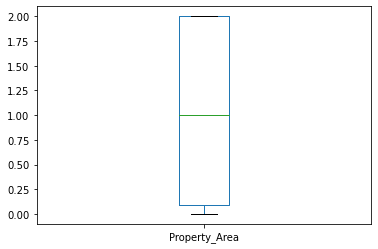

In [57]:
Loan_Application['Property_Area'].plot.box()

<AxesSubplot:>

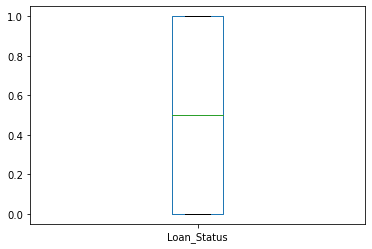

In [58]:
Loan_Application['Loan_Status'].plot.box()

From the above outlier plot we can see that Gender, Education, Self-Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term have outliers.

### Bivariate Analysis 


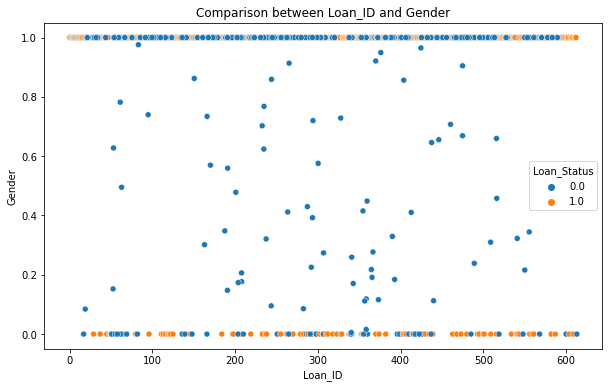

In [59]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Loan_ID and Gender')
sns.scatterplot(Loan_Application['Loan_ID'], Loan_Application["Gender"], hue=Loan_Application["Loan_Status"]);

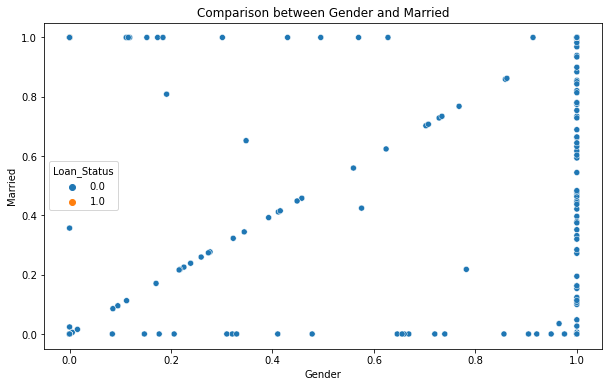

In [60]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Gender and Married')
sns.scatterplot(Loan_Application['Gender'], Loan_Application["Married"], hue=Loan_Application["Loan_Status"]);

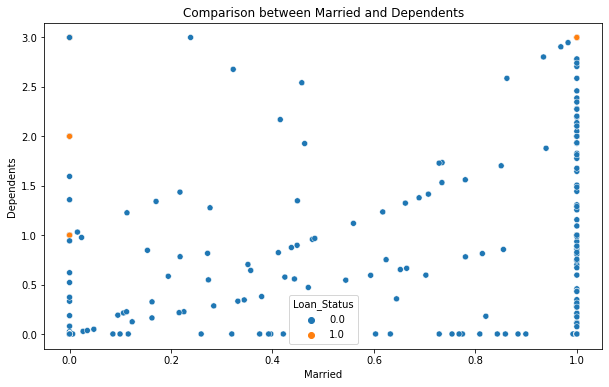

In [61]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Married and Dependents')
sns.scatterplot(Loan_Application['Married'], Loan_Application["Dependents"], hue=Loan_Application["Loan_Status"]);

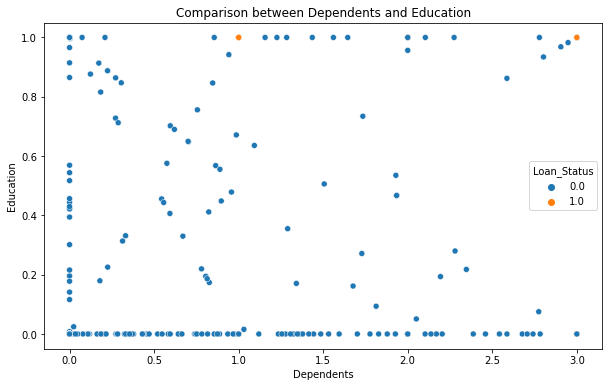

In [62]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Dependents and Education')
sns.scatterplot(Loan_Application['Dependents'], Loan_Application["Education"], hue=Loan_Application["Loan_Status"]);

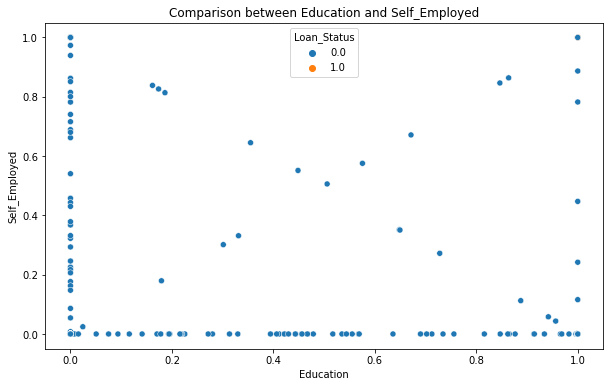

In [63]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Education and Self_Employed')
sns.scatterplot(Loan_Application['Education'], Loan_Application["Self_Employed"], hue=Loan_Application["Loan_Status"]);

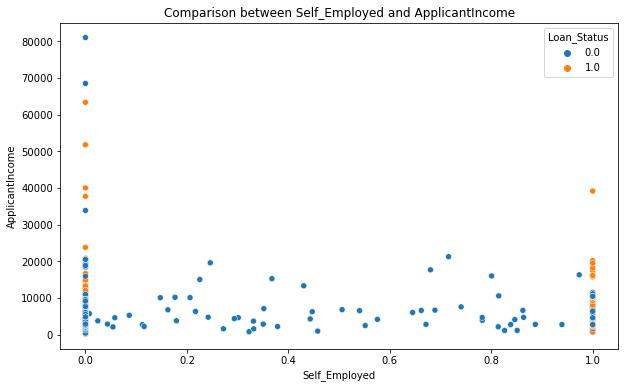

In [64]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Self_Employed and ApplicantIncome')
sns.scatterplot(Loan_Application['Self_Employed'], Loan_Application["ApplicantIncome"], hue=Loan_Application["Loan_Status"]);

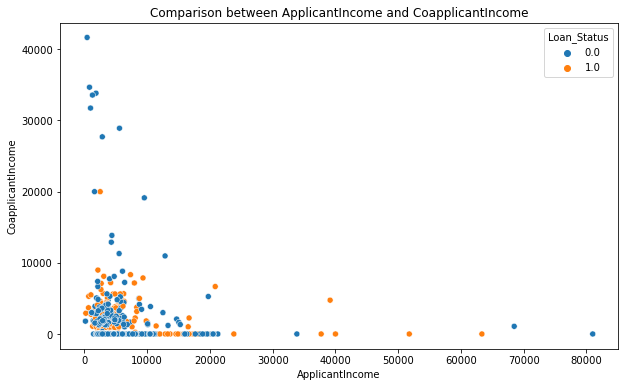

In [65]:
plt.figure(figsize=[10,6])
plt.title('Comparison between ApplicantIncome and CoapplicantIncome')
sns.scatterplot(Loan_Application['ApplicantIncome'], Loan_Application["CoapplicantIncome"], hue=Loan_Application["Loan_Status"]);

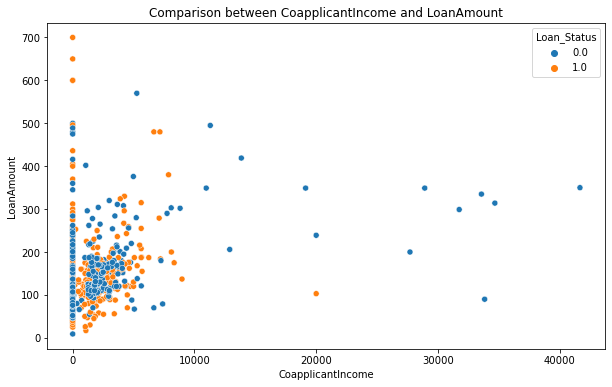

In [66]:
plt.figure(figsize=[10,6])
plt.title('Comparison between CoapplicantIncome and LoanAmount')
sns.scatterplot(Loan_Application['CoapplicantIncome'], Loan_Application["LoanAmount"], hue=Loan_Application["Loan_Status"]);

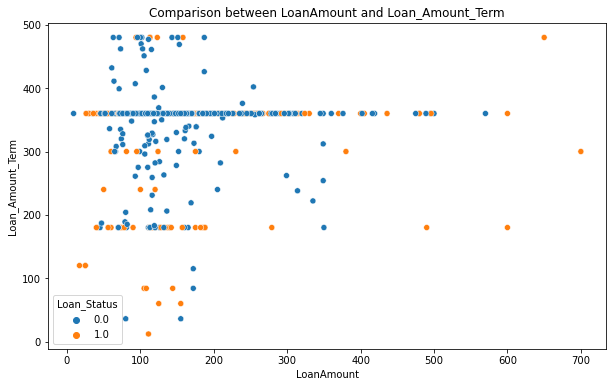

In [67]:
plt.figure(figsize=[10,6])
plt.title('Comparison between LoanAmount and Loan_Amount_Term')
sns.scatterplot(Loan_Application['LoanAmount'], Loan_Application["Loan_Amount_Term"], hue=Loan_Application["Loan_Status"]);

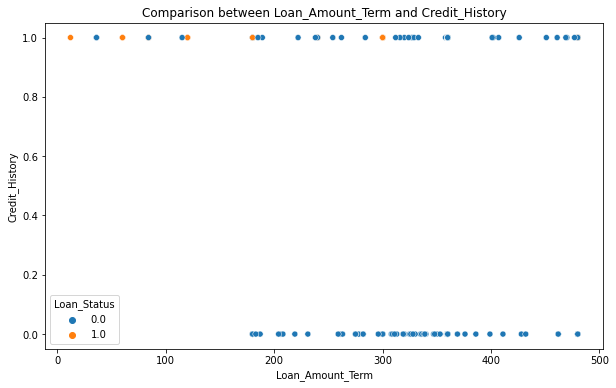

In [68]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Loan_Amount_Term and Credit_History')
sns.scatterplot(Loan_Application['Loan_Amount_Term'], Loan_Application["Credit_History"], hue=Loan_Application["Loan_Status"]);

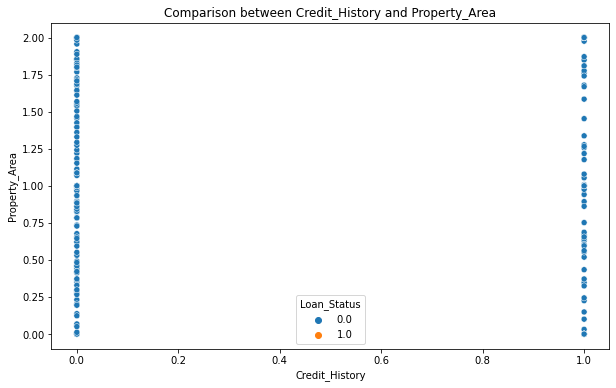

In [69]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Credit_History and Property_Area')
sns.scatterplot(Loan_Application['Credit_History'], Loan_Application["Property_Area"], hue=Loan_Application["Loan_Status"]);

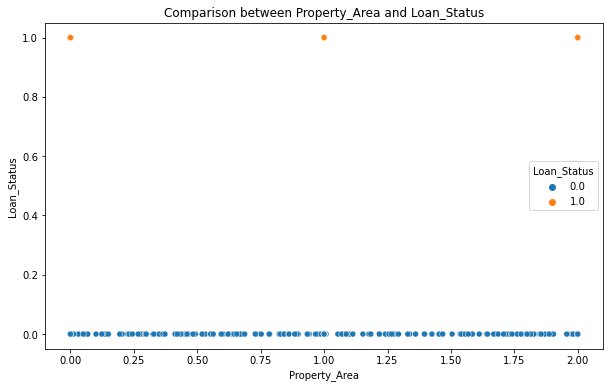

In [70]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Property_Area and Loan_Status')
sns.scatterplot(Loan_Application['Property_Area'], Loan_Application["Loan_Status"], hue=Loan_Application["Loan_Status"]);

From the Bivariate Analysis we can say that there is no correlation between any columns.

In [71]:
Loan_Application.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,306.035714,0.807755,0.637093,0.741916,0.229976,0.132991,5430.341232,1723.776066,146.648104,343.921801,0.706161,1.036506,0.500000
std,171.077977,0.377057,0.461889,0.968209,0.402495,0.323068,6016.292114,3588.491135,81.878179,60.375916,0.455789,0.762578,0.500296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,165.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2890.500000,0.000000,103.000000,360.000000,0.000000,0.092485,0.000000
50%,303.225440,1.000000,1.000000,0.000000,0.000000,0.000000,3808.500000,1079.000000,125.000000,360.000000,1.000000,1.000000,0.500000
75%,451.250000,1.000000,1.000000,1.261009,0.273591,0.000000,5815.750000,2250.000000,168.250000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


### Multivariate Analysis

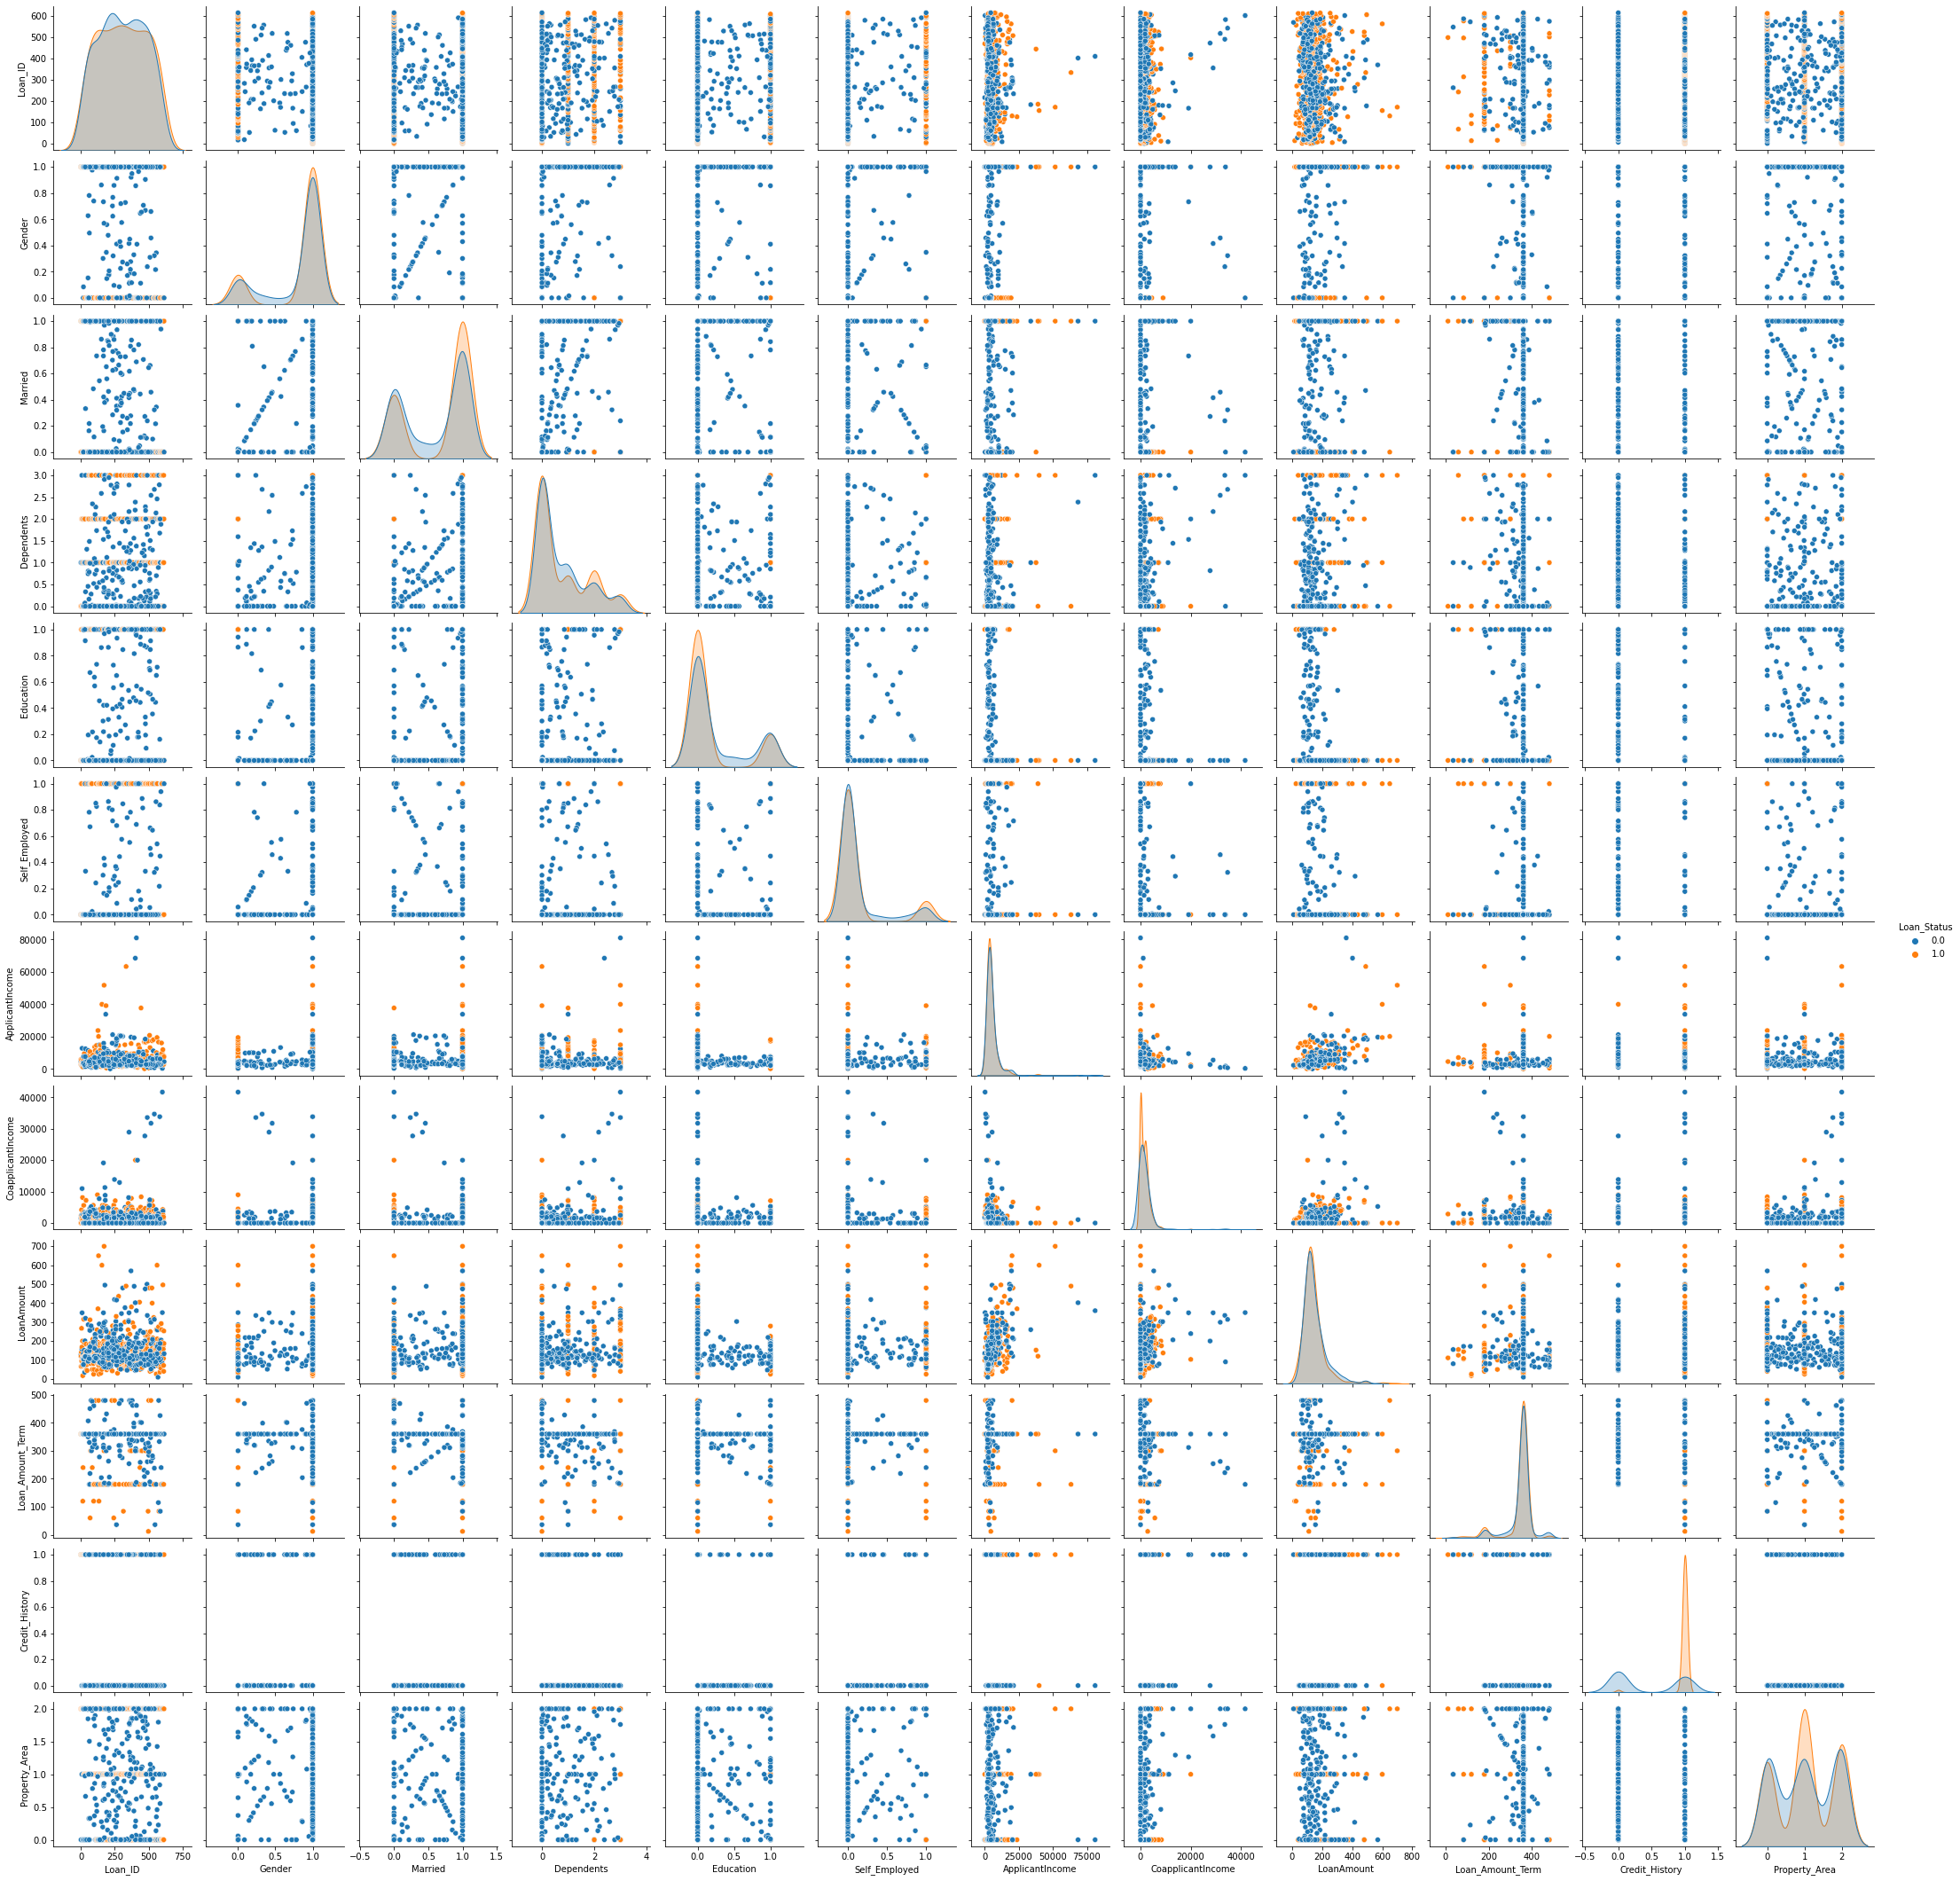

In [72]:
sns.pairplot(Loan_Application,hue="Loan_Status")  

<AxesSubplot:>

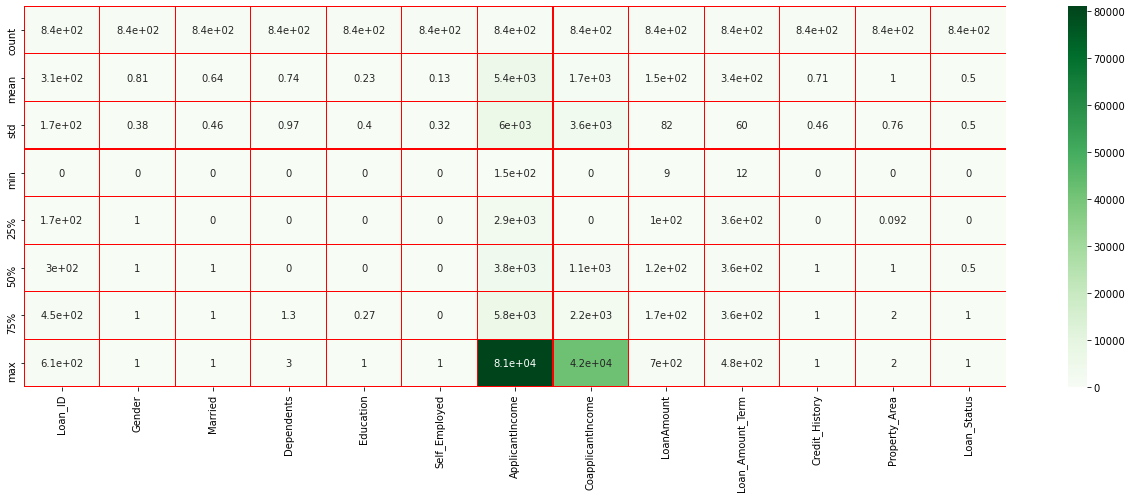

In [73]:
plt.figure(figsize=(22,7))
sns.heatmap(Loan_Application.describe(),annot=True,linewidths=0.1,linecolor="red",cmap='Greens')

## Correlation of the columns with the target columns:


In [74]:
cor=Loan_Application.corr()
cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.013573,-0.004415,0.070908,0.058779,0.044364,0.004447,0.061466,0.019531,-0.054053,-0.028648,-0.130631,0.010948
Gender,-0.013573,1.000000,0.373199,0.172526,0.069980,0.022758,0.072477,0.027549,0.109664,-0.070502,-0.021929,-0.033615,0.038533
Married,-0.004415,0.373199,1.000000,0.344979,0.045997,-0.004556,0.026201,0.065658,0.136879,-0.132427,-0.000052,0.006364,0.098289
Dependents,0.070908,0.172526,0.344979,1.000000,0.062829,0.060090,0.076406,0.122892,0.148461,-0.154346,-0.040881,0.006840,0.009579
Education,0.058779,0.069980,0.045997,0.062829,1.000000,-0.016855,-0.155407,-0.074421,-0.186741,-0.105076,-0.138864,-0.077460,-0.088658
Self_Employed,0.044364,0.022758,-0.004556,0.060090,-0.016855,1.000000,0.128144,-0.015724,0.102727,-0.024481,-0.012655,-0.001741,-0.000896
ApplicantIncome,0.004447,0.072477,0.026201,0.076406,-0.155407,0.128144,1.000000,-0.115211,0.560187,-0.013945,-0.009860,-0.038716,-0.007696
CoapplicantIncome,0.061466,0.027549,0.065658,0.122892,-0.074421,-0.015724,-0.115211,1.000000,0.259225,-0.123494,0.037375,0.069164,-0.061138
LoanAmount,0.019531,0.109664,0.136879,0.148461,-0.186741,0.102727,0.560187,0.259225,1.000000,0.025757,0.022623,-0.037934,-0.036502
Loan_Amount_Term,-0.054053,-0.070502,-0.132427,-0.154346,-0.105076,-0.024481,-0.013945,-0.123494,0.025757,1.000000,-0.016613,-0.058547,-0.041275


<AxesSubplot:>

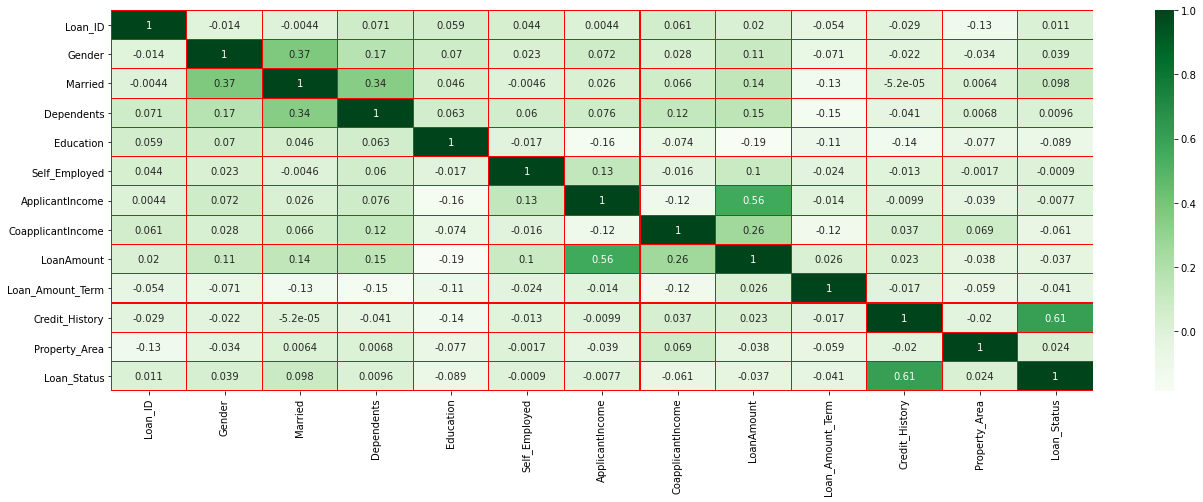

In [75]:
plt.figure(figsize=(22,7))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="red",cmap='Greens')

From the above heatmap we can say that positive correlation can be seen in:
    
LoanAmount and ApplicantIncome with value=0.59

Credit_History and Loan_Status with value=0.6


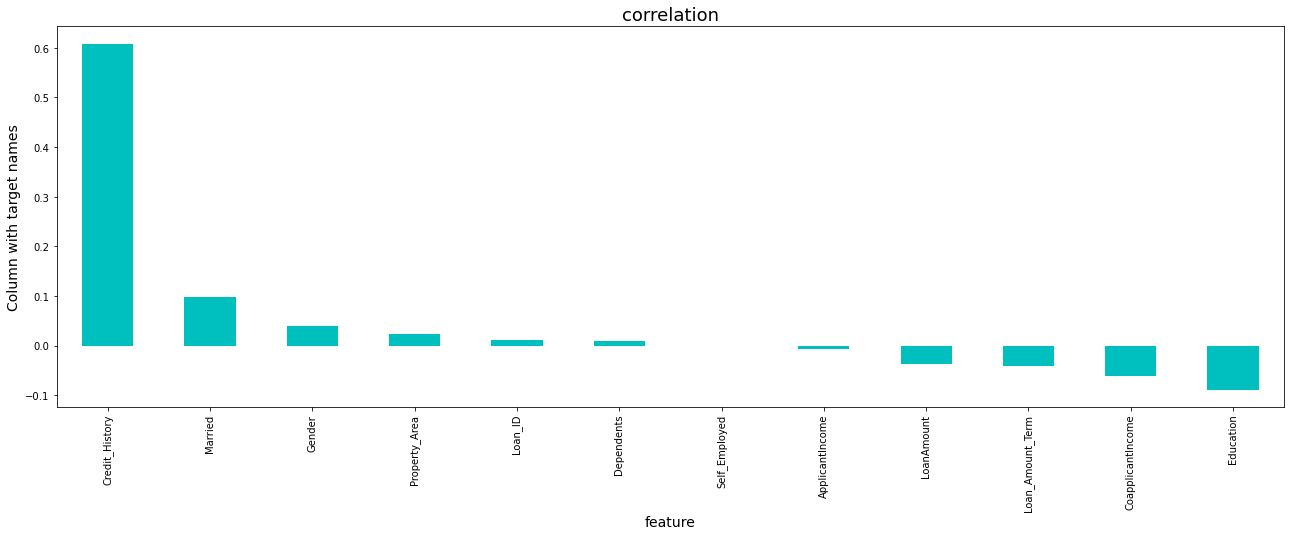

In [76]:
plt.figure(figsize=(22,7))
cor['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Considering the outlier removal

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(Loan_Application))
Loan_Application_new=Loan_Application[(z<3).all(axis=1)]
Loan_Application_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.00000,0.000000,0.000000,0.00000,0.00000,5849,0,120,360,1,2.000000,1.0
1,1.000000,1.00000,1.000000,1.000000,0.00000,0.00000,4583,1508,128,360,1,0.000000,0.0
2,2.000000,1.00000,1.000000,0.000000,0.00000,1.00000,3000,0,66,360,1,2.000000,1.0
3,3.000000,1.00000,1.000000,0.000000,1.00000,0.00000,2583,2358,120,360,1,2.000000,1.0
4,4.000000,1.00000,0.000000,0.000000,0.00000,0.00000,6000,0,141,360,1,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,245.012969,1.00000,1.000000,2.103896,1.00000,0.00000,2632,1683,155,360,0,0.298701,0.0
840,373.259648,0.11574,1.000000,0.000000,1.00000,0.11574,2202,3261,176,339,0,0.884260,0.0
841,352.698123,1.00000,0.437307,0.874613,0.00000,0.00000,4839,1988,185,360,1,0.562693,0.0
842,293.522344,1.00000,0.603236,0.000000,0.00000,0.00000,20494,0,262,360,1,0.000000,0.0


In [78]:
Loan_Application_new.shape

(795, 13)

In [79]:
Loan_Application.shape

(844, 13)

In [80]:
844-799

45

In [81]:
45/844

0.0533175355450237

Here the data loss after the outlier removal is less than 6-8 percent, so we will take the new DataFrame for our further 

operations.

### Skewness Checking

In [82]:
Loan_Application_new.skew()

Loan_ID              0.014824
Gender              -1.534780
Married             -0.559429
Dependents           1.077854
Education            1.218492
Self_Employed        2.224064
ApplicantIncome      2.323126
CoapplicantIncome    1.574576
LoanAmount           1.170437
Loan_Amount_Term    -1.964306
Credit_History      -0.864727
Property_Area       -0.036774
Loan_Status         -0.002520
dtype: float64

Here from the skewness data we can see that 

Negative Correlation in the columns:
    
Gender with value=-1.522379

Married with value=-0.542804

Loan_Amount_Term with value=-2.042145

Credit_History with value=-0.859591


and positive skewness in the columns:

Dependents with value=1.005217

Education with value=1.210613

Self_Employed with value=2.120972

ApplicantIncome with value=2.156421

CoapplicantIncome with value=1.445762

LoanAmount with value=1.293235




In [83]:
x=Loan_Application.iloc[:,0:-1]
y=Loan_Application.iloc[:,-1]

In [84]:
from sklearn.preprocessing import power_transform
xnew=power_transform(x, method='yeo-johnson')
xnew

array([[-2.19767365e+00,  5.31045266e-01, -1.35115102e+00, ...,
         1.71869623e-01,  6.45063859e-01,  1.23205592e+00],
       [-2.17476065e+00,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01,  6.45063859e-01, -1.39689725e+00],
       [-2.15483514e+00,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01,  6.45063859e-01,  1.23205592e+00],
       ...,
       [ 3.40677026e-01,  5.31045266e-01, -6.61944248e-01, ...,
         1.71869623e-01,  6.45063859e-01, -5.83831356e-01],
       [ 1.68436386e-02,  5.31045266e-01, -3.02465703e-01, ...,
         1.71869623e-01,  6.45063859e-01, -1.39689725e+00],
       [ 9.96333897e-01,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01, -1.55023411e+00, -4.36358594e-04]])

In [85]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
Xscaled=SC.fit_transform(xnew)
Xscaled

array([[-2.19767365e+00,  5.31045266e-01, -1.35115102e+00, ...,
         1.71869623e-01,  6.45063859e-01,  1.23205592e+00],
       [-2.17476065e+00,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01,  6.45063859e-01, -1.39689725e+00],
       [-2.15483514e+00,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01,  6.45063859e-01,  1.23205592e+00],
       ...,
       [ 3.40677026e-01,  5.31045266e-01, -6.61944248e-01, ...,
         1.71869623e-01,  6.45063859e-01, -5.83831356e-01],
       [ 1.68436386e-02,  5.31045266e-01, -3.02465703e-01, ...,
         1.71869623e-01,  6.45063859e-01, -1.39689725e+00],
       [ 9.96333897e-01,  5.31045266e-01,  7.98795430e-01, ...,
         1.71869623e-01, -1.55023411e+00, -4.36358594e-04]])

In [86]:
ytrain=y
xtrain=Xscaled

### train_test_split

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print("accuracy score is",accu*100, "at random_state", i)

accuracy score is 74.55197132616487 at random_state 0
accuracy score is 74.91039426523297 at random_state 1
accuracy score is 77.77777777777779 at random_state 2
accuracy score is 81.00358422939068 at random_state 3
accuracy score is 81.36200716845879 at random_state 4
accuracy score is 76.70250896057348 at random_state 5
accuracy score is 73.47670250896059 at random_state 6
accuracy score is 78.85304659498208 at random_state 7
accuracy score is 75.62724014336918 at random_state 8
accuracy score is 81.00358422939068 at random_state 9
accuracy score is 74.19354838709677 at random_state 10
accuracy score is 76.70250896057348 at random_state 11
accuracy score is 81.36200716845879 at random_state 12
accuracy score is 76.34408602150538 at random_state 13
accuracy score is 73.47670250896059 at random_state 14
accuracy score is 77.06093189964157 at random_state 15
accuracy score is 77.41935483870968 at random_state 16
accuracy score is 81.36200716845879 at random_state 17
accuracy score is 79

In [88]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state", maxRS)

Best accuracy is  0.8315412186379928 on Random_state 171


In [89]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=33)


In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [91]:
from sklearn.svm import SVC
SV = SVC()
SV.fit(x_train, y_train)
predsv = SV.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test, predsv))

0.8315412186379928
[[ 97  38]
 [  9 135]]
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.80       135
         1.0       0.78      0.94      0.85       144

    accuracy                           0.83       279
   macro avg       0.85      0.83      0.83       279
weighted avg       0.85      0.83      0.83       279



In [92]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
#RandomForestClassifier(100)----> Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8637992831541219
[[108  27]
 [ 11 133]]
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       135
         1.0       0.83      0.92      0.88       144

    accuracy                           0.86       279
   macro avg       0.87      0.86      0.86       279
weighted avg       0.87      0.86      0.86       279



In [93]:
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8064516129032258
[[106  29]
 [ 25 119]]
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       135
         1.0       0.80      0.83      0.82       144

    accuracy                           0.81       279
   macro avg       0.81      0.81      0.81       279
weighted avg       0.81      0.81      0.81       279



In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8100358422939068
[[104  31]
 [ 22 122]]
              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       135
         1.0       0.80      0.85      0.82       144

    accuracy                           0.81       279
   macro avg       0.81      0.81      0.81       279
weighted avg       0.81      0.81      0.81       279



In [95]:
GnB=GaussianNB()
GnB.fit(x_train,y_train)
predGnB=GnB.predict(x_test)
print(accuracy_score(y_test,predGnB))
print(confusion_matrix(y_test,predGnB))
print(classification_report(y_test,predGnB))

0.8064516129032258
[[ 83  52]
 [  2 142]]
              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75       135
         1.0       0.73      0.99      0.84       144

    accuracy                           0.81       279
   macro avg       0.85      0.80      0.80       279
weighted avg       0.85      0.81      0.80       279



In [96]:
#k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7741935483870968
[[100  35]
 [ 28 116]]
              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       135
         1.0       0.77      0.81      0.79       144

    accuracy                           0.77       279
   macro avg       0.77      0.77      0.77       279
weighted avg       0.77      0.77      0.77       279



## Cross-Validation-Score

In [97]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SV,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.70414201 0.70414201 0.83431953 0.82840237 0.79166667]
0.7725345167652861
0.057722981107344744


In [98]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.38461538 0.29585799 0.82248521 0.77514793 0.5       ]
0.555621301775148
0.2093905518574575


In [99]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.32544379 0.27218935 0.42011834 0.65088757 0.46428571]
0.4265849535080304
0.13102852222220238


In [100]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.33727811 0.23076923 0.4852071  0.5443787  0.48214286]
0.4159551986475064
0.11502447985545025


In [101]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GnB,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.65088757 0.71005917 0.81065089 0.80473373 0.80357143]
0.7559805579036348
0.06447312073517227


In [102]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71597633 0.68047337 0.79289941 0.78698225 0.73214286]
0.7416948436179205
0.04283364867772577


From the cross validation score we can say that KNeighborsClassifier model is performing best

## Hyper parameter tuning

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameter = {'n_neighbors':np.arange(1,9),
            'leaf_size':np.arange(2,10), 
            'p':np.arange(1,7),
            'n_jobs' :np.arange(3,7)}

In [105]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [106]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_jobs': array([3, 4, 5, 6]),
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'p': array([1, 2, 3, 4, 5, 6])})

In [107]:
GCV.best_params_

{'leaf_size': 2, 'n_jobs': 3, 'n_neighbors': 1, 'p': 1}

In [108]:
Final_model= KNeighborsClassifier(leaf_size = 2, n_jobs = 3, n_neighbors = 1, p = 1)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

81.72043010752688


# AUC-ROC Curve

In [109]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

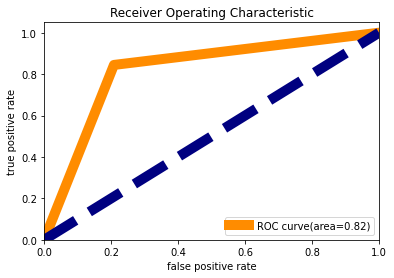

In [110]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the Model

In [111]:
import joblib

joblib.dump(Final_model,"Evaluation_Project_6.pkl")

['Evaluation_Project_6.pkl']

# Conclusion


In [112]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
Loan_Application_Final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
Loan_Application_Final

,original,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
274,1.0,1.0
275,1.0,1.0
276,1.0,1.0
277,1.0,0.0


Here 0 denotes N and 1 denotes Y